In [7]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import interpolate



In [8]:
signal = np.loadtxt('signal.dat', delimiter=',')
incompletos = np.loadtxt('incompletos.dat', delimiter=',')

In [57]:
#Grafica de signal e incompletos
plt.figure(figsize=(8,5))
plt.plot(signal[:,0], signal[:,1])
plt.plot(incompletos[:,0], incompletos[:,1])
plt.xlabel('t [AU]')
plt.ylabel('x(t) [AU]')
plt.title('Datos originales')
plt.savefig('GomezMaria_signal.pdf')
plt.close()
#plt.show()

In [10]:

#Transformada de Fourier
def fourier(x):
    N = len(x)
    expo = np.exp(-2*np.pi*1j/N)
    expos = np.asarray([np.power(expo,k) for k in range(N)])
    F = np.zeros(N, dtype = complex)
    for m in range(N):
        F[m] = np.dot(np.power(expos,m),x)
    return F

In [30]:
#Magnitud de la transformada de fourier de los datos
#new_signal=np.asarray(signal)
RF = abs(fourier(signal[:,1]))
#las frecuencias son fn = n*F/N, con F la frecuencia a la que fueron muestreados los datos. Asumimos F = 1 ya que no la
#conocemos. Incluimos frecuencias negativas cons los mismos valores.
frecuenciasPositivas = np.asarray([n/len(signal) for n in range(int(len(signal)/2))])
frecuenciasNegativas = np.asarray([(-int(len(signal)/2) + n)/len(signal) for n in range(int(len(signal)/2))])
frecuencias = np.concatenate((frecuenciasPositivas, frecuenciasNegativas),axis=0)

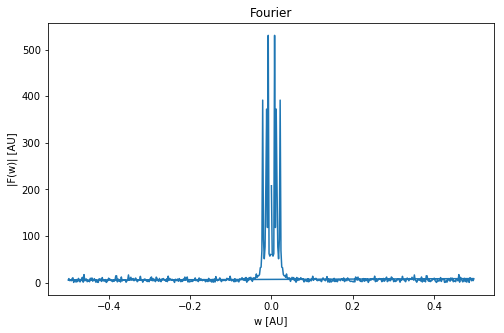

 No utilicé el paquete fftfreq


In [31]:
plt.figure(figsize=(8,5))
plt.plot(frecuencias,RF)
plt.xlabel('w [AU]')
plt.ylabel('|F(w)| [AU]')
plt.title('Fourier propio')
plt.savefig('GomezMaria_TF.pdf')
plt.show()
#plt.close()
print (' No utilicé el paquete fftfreq')

In [13]:
#Encontrar las frecuencias principales. Solo analizar la mitad de la señal.
RF_Importantes = RF[0:int(len(signal)/2)-1]
Frec_Importantes = frecuencias[0:int(len(signal)/2)-1]
MagnitudesOrdenadas = np.sort(RF_Importantes)
MagnitudesOrdenadas = MagnitudesOrdenadas[::-1]
lasPrimerasMagnitudes = MagnitudesOrdenadas[0:10].tolist()
lasPrimerasFrecuencias_indx = [(RF_Importantes.tolist()).index(i) for i in lasPrimerasMagnitudes]
lasPrimerasFrecuencias = [Frec_Importantes[i] for i in lasPrimerasFrecuencias_indx]

In [17]:
# Estas son las primeras 11 frecuencias principales.

print('Las primeras frecuencias son:',lasPrimerasFrecuencias,)

Las primeras frecuencias son: [0.0, 0.001953125, 0.00390625, 0.005859375, 0.0078125, 0.009765625, 0.01171875, 0.013671875, 0.015625, 0.017578125]


In [18]:

print ('La frecuencia máxima:', max(np.fft.fftfreq(len(signal))))

La frecuencia máxima: 0.498046875


In [19]:
flinear = interpolate.interp1d(incompletos[:,0], incompletos[:,1], kind="linear")
fquadratic= interpolate.interp1d(incompletos[:,0], incompletos[:,1], kind="quadratic")
fcubic = interpolate.interp1d(incompletos[:,0], incompletos[:,1],kind = "cubic")

In [56]:
x=np.linspace(min(incompletos[:,0]),max(incompletos[:,0]),len(signal[:,0]))
#plt.scatter(incompletos[:,0],incompletos[:,1],label="incompletos",color="red")
plt.plot(x,fquadratic(x),label="quadratic")
plt.plot(x, fcubic(x),label="cubic")
plt.xlabel("tiempo")
plt.ylabel("señal")
plt.title("interpolación de datos")
plt.savefig('GomezMaria_interpolacion')




#plt.show()

In [48]:
f=100
dt=1 / (f * 128 ) #extraido del notebook de github computo uniandes

fft_x=np.fft.fft(signal[:,1])
frec=np.fft.fftfreq(np.shape(signal)[0],dt)

#verificación con el paquete
#plt.plot(frec,fft_x)
#plt.show()
def filtro(x,corte):
    
    copia=np.copy(x)
    copia[abs(frec) > corte] = 0
    
    nuevo=np.fft.ifft(copia)
    
    return copia,nuevo


Fourier_cuadratica=fourier(fquadratic(x))
Fourier_cubic=fourier(fcubic(x))

In [59]:

plt.figure()


plt.subplot(221)
plt.plot(frecuencias, RF)
plt.ylabel('signal')
plt.title("Paquete fft")


plt.subplot(222)
plt.plot(frecuencias, RF)
plt.ylabel('signal')
plt.title("Signal")


plt.subplot(223)
plt.plot(frec,fquadratic(x))
plt.xlabel('frecuencias')
plt.title("Cuadratica")


plt.subplot(224)
plt.plot(frec,fcubic(x))
plt.xlabel('frecuencias')
plt.title("Cubica")



plt.savefig('GomezMaria_TF_interpola')
plt.close()

#plt.show()


print("No hay diferencias entre las implementaciones, sin embargo los picos cambian, aparecen algunos")




plt.figure()

plt.subplot(221)
plt.plot(incompletos[:,0],incompletos[:,1])
plt.plot(x,filtro(Fourier_cuadratica,1000)[1])
plt.ylabel('Signal')
plt.title("Filtro 1000")


plt.subplot(222)
plt.plot(incompletos[:,0],incompletos[:,1])
plt.plot(x,filtro(Fourier_cuadratica,500)[1])
plt.ylabel('Signal')
plt.title("Filtro 500")



plt.savefig('GomezMaria_filtrada')
plt.close()
#plt.show()

plt.figure()

plt.subplot(221)
plt.plot(incompletos[:,0],incompletos[:,1])
plt.plot(x,filtro(transformada_cubic,1000)[1])
plt.ylabel('Signal')
plt.title("Filtro 1000 Incompletos")

plt.subplot(222)
plt.plot(incompletos[:,0],incompletos[:,1])
plt.plot(x,filtro(transformada_cubic,500)[1])
plt.ylabel('Signal')
plt.title("Filtro 500 Incompletos")


plt.savefig('GomezMaria_2Filtros_incompletos')
plt.close()
#plt.show()

No hay diferencias entre las implementaciones, sin embargo los picos cambian, aparecen algunos


/Users/mariafernandagomez/miniconda3/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
